<a href="https://www.kaggle.com/code/muichimon/lung-tumor-visualisation-ipynb?scriptVersionId=263962318" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **IMPORTS**
---

In [1]:
%pip install celluloid --q

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib notebook
    
from pathlib import Path
import nibabel as nib
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from celluloid import Camera
from IPython.display import HTML

import matplotlib.pyplot as plt
%matplotlib inline

## **SET PATH**
---

In [3]:
root_path = Path("/kaggle/input/medical-decathlon-lung-tumor-segmentation/Lung-Tumor-Segmentation/")

In [4]:
def get_img_path(patient_path: Path) -> Path:
    return next((patient_path / "data").glob("*.nii"))

def get_label_path(patient_path: Path) -> Path:
    return next((patient_path / "label").glob("*.nii"))

## **VISUALISE**
---

In [5]:
subject = "30"

img = nib.load(get_img_path(root_path/subject)).get_fdata()
label = nib.load(get_label_path(root_path/subject)).get_fdata().astype(int)

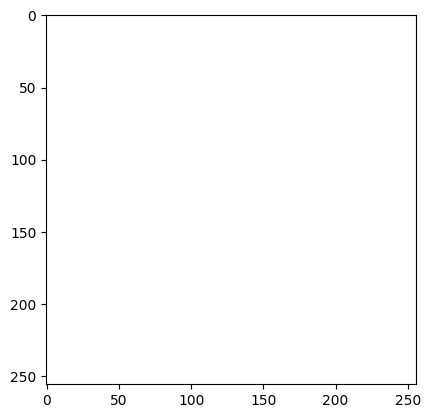

In [6]:
fig = plt.figure()
camera = Camera(fig)

for i in range(img.shape[2]):
    
    plt.imshow(img[:,:,i], cmap = "bone")
    
    mask_ = np.ma.masked_where(label[:,:,i] == 0, label[:,:,i])
    plt.imshow(mask_, cmap = "autumn", alpha = 0.5)
    
    camera.snap()

animation = camera.animate()

In [7]:
HTML(animation.to_html5_video())